## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load The Dataset

In [2]:
data=pd.read_csv(r"C:\Users\LENOVO\Downloads\Copy of Data_Dictionary_HousePrice\house_price.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.shape

(1460, 81)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
from ydata_profiling import ProfileReport

In [9]:
prof = ProfileReport(data)
prof.to_file(output_file="output.html")

C:\Users\LENOVO\Documents\New folder\Lib\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\LENOVO\Documents\New folder\Lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
cat_data=data[data.dtypes[data.dtypes=="object"].index]
num_data=data[data.dtypes[data.dtypes!="object"].index]

In [8]:
cat_data.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
num_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

## Missing Values

In [10]:
cat_data.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [11]:
num_data.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [12]:
cat_data.drop(columns="Alley", inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11780\922226239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data.drop(columns="Alley", inplace=True)


In [13]:
cat_data.drop(columns="PoolQC", inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11780\75913220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data.drop(columns="PoolQC", inplace=True)


In [14]:
cat_data.drop(columns="Fence", inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11780\1171619455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data.drop(columns="Fence", inplace=True)


In [15]:
cat_data.drop(columns="MiscFeature", inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11780\3158535078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data.drop(columns="MiscFeature", inplace=True)


In [16]:
num_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [20]:
num_data.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [19]:
num_data.fillna(num_data.median(), inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11780\812242689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data.fillna(num_data.median(), inplace=True)


In [21]:
cat_data.isnull().sum()

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64

In [79]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
cat_data['BsmtQual'] = imputer.fit_transform(cat_data[['BsmtQual']])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11780\1120778897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['BsmtQual'] = imputer.fit_transform(cat_data[['BsmtQual']])


In [81]:
cat_data.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

## Check Duplicated

In [82]:
data.duplicated().sum()

0

## Exploratory Data Analysis

## Univariate Analysis

## Histogram

In [84]:
num_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [86]:
cols=['OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']

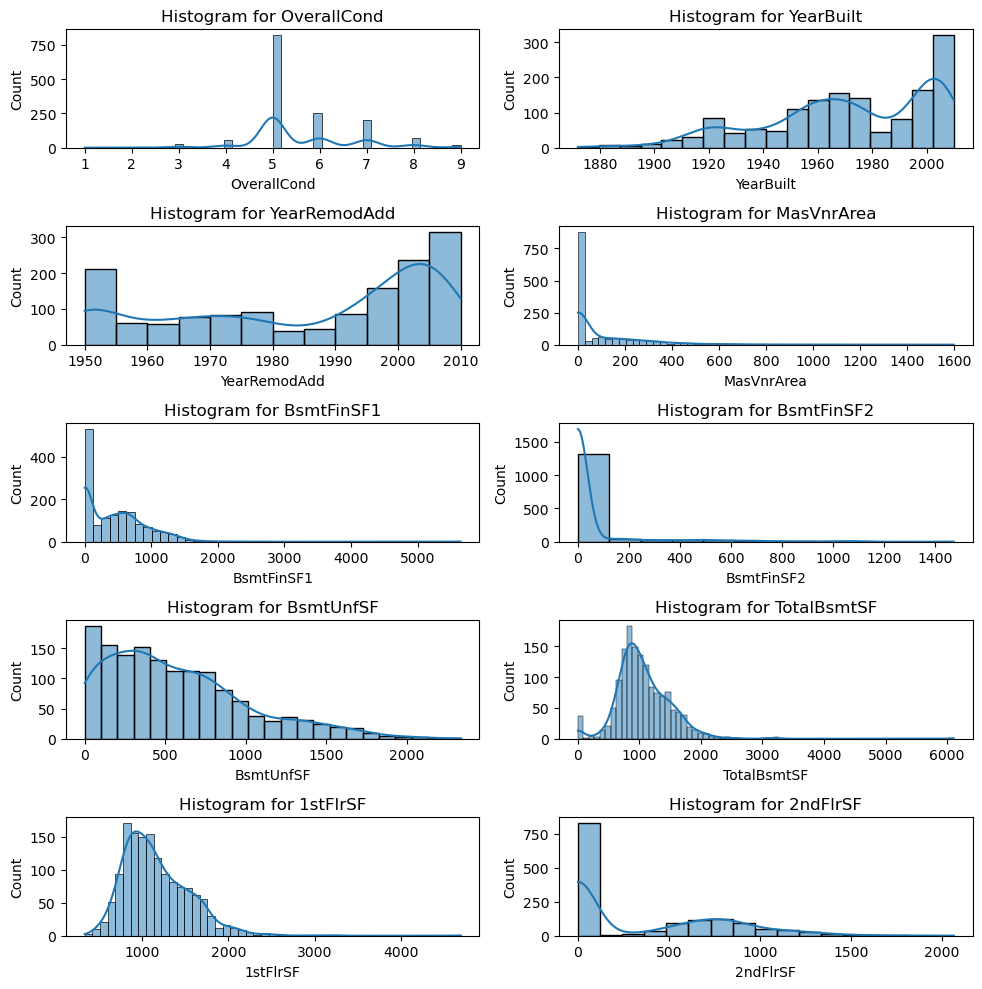

In [88]:
plt.figure(figsize=(10,10))
for i in range(len(cols)):
    plt.subplot(5,2,i+1)
    sns.histplot(x=data[cols[i]], kde=True)
    plt.title(f"Histogram for {cols[i]}")
plt.tight_layout()
plt.show()

#### mostly data is right skewed except yearbuilt and yearremodadd

## Boxplot

In [90]:
cols=['LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']

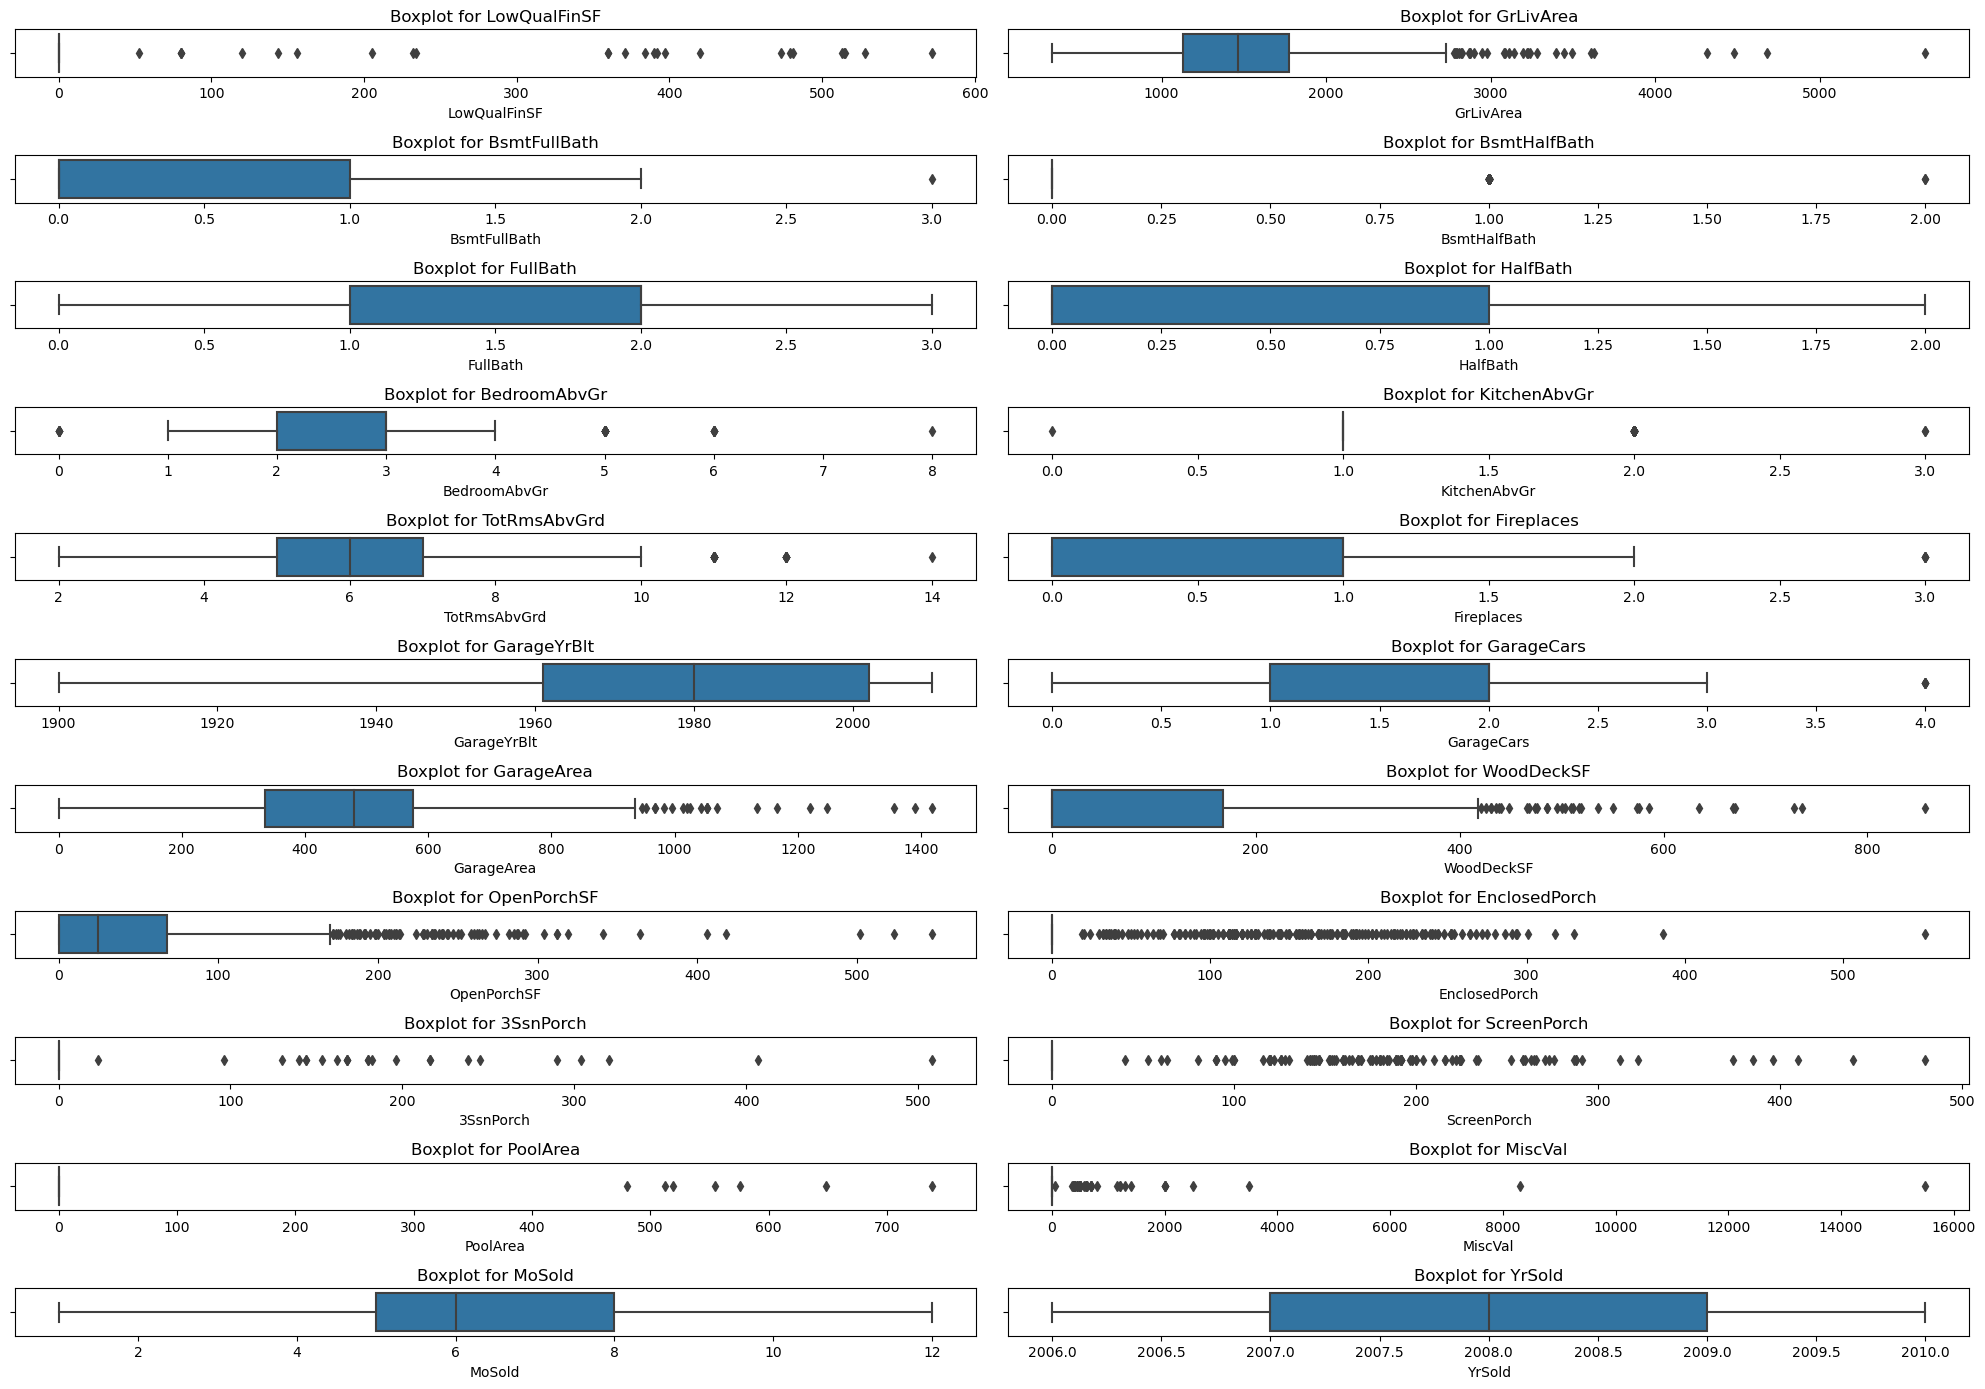

In [92]:
plt.figure(figsize=(20,14))
for i in range(len(cols)):
    plt.subplot(11,2,i+1)
    sns.boxplot(x=data[cols[i]])
    plt.title(f"Boxplot for {cols[i]}")
plt.tight_layout()
plt.show()

#### mostly data have right outliers

## Bivariate Analysis

## Countplot

In [93]:
cat_data.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [94]:
cols=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

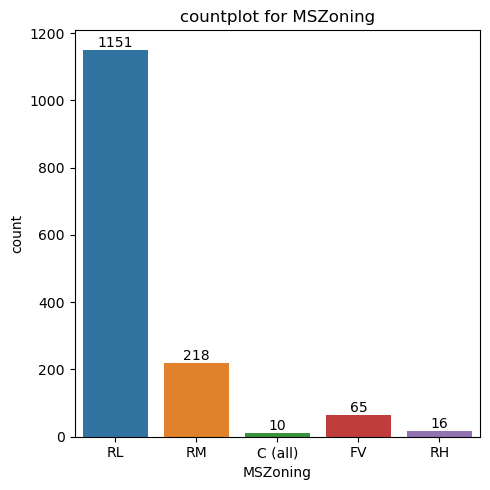

In [96]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=data[cols[0]])
ax.bar_label(ax.containers[0])
plt.title(f'countplot for {cols[0]}')
plt.tight_layout()
plt.show()

#### Residential Low Density is the majority of people prefered

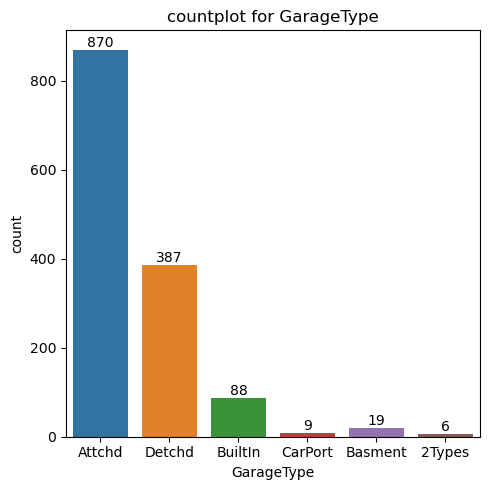

In [98]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=data[cols[32]])
ax.bar_label(ax.containers[0])
plt.title(f'countplot for {cols[32]}')
plt.tight_layout()
plt.show()

#### mostly garagetype have Attached to home

In [112]:
num_data.describe(percentiles=[0.01,.02,.1,.25,.50,.75,.98,.99]).T

,count,mean,std,min,1%,2%,10%,25%,50%,75%,98%,99%,max
Id,1460.0,730.500000,421.610009,1.0,15.59,30.18,146.9,365.75,730.5,1095.25,1430.82,1445.41,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,20.00,20.0,20.00,50.0,70.00,188.20,190.00,190.0
LotFrontage,1460.0,69.863699,22.027677,21.0,21.00,24.00,49.0,60.00,69.0,79.00,120.82,137.41,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,1680.00,2124.74,5000.0,7553.50,9478.5,11601.50,25251.62,37567.64,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,3.00,4.00,5.0,5.00,6.0,7.00,9.00,10.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,3.00,3.00,5.0,5.00,5.0,6.00,8.00,9.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1899.18,1908.36,1924.9,1954.00,1973.0,2000.00,2008.00,2009.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1950.00,1950.00,1950.0,1967.00,1994.0,2004.00,2008.00,2009.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.00,0.0,0.00,0.0,164.25,650.82,791.28,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,0.00,0.0,0.00,383.5,712.25,1442.64,1572.41,5644.0


In [113]:
def outliercapM1(x):
    x=x.clip(upper=x.quantile(.99))
   # x=x.clip(lower=x.quantile(.01))
    return x

In [114]:
num_data=num_data.apply(outliercapM1)

In [115]:
num_data.describe(percentiles=[0.01,.02,.1,.25,.50,.75,.98,.99]).T

,count,mean,std,min,1%,2%,10%,25%,50%,75%,98%,99%,max
Id,1460.0,730.422021,421.476733,1.0,15.59,30.18,146.9,365.75,730.5,1095.25,1430.82,1445.1681,1445.41
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,20.00,20.0,20.00,50.0,70.00,188.20,190.0000,190.00
LotFrontage,1460.0,69.459692,19.581352,21.0,21.00,24.00,49.0,60.00,69.0,79.00,120.82,137.1681,137.41
LotArea,1460.0,10062.113425,5063.798824,1300.0,1680.00,2124.74,5000.0,7553.50,9478.5,11601.50,25251.62,36937.7324,37567.64
OverallQual,1460.0,6.099315,1.382997,1.0,3.00,4.00,5.0,5.00,6.0,7.00,9.00,10.0000,10.00
OverallCond,1460.0,5.575342,1.112799,1.0,3.00,3.00,5.0,5.00,5.0,6.00,8.00,9.0000,9.00
YearBuilt,1460.0,1971.267123,30.202036,1872.0,1899.18,1908.36,1924.9,1954.00,1973.0,2000.00,2008.00,2009.0000,2009.00
YearRemodAdd,1460.0,1984.861644,20.640499,1950.0,1950.00,1950.00,1950.0,1967.00,1994.0,2004.00,2008.00,2009.0000,2009.00
MasVnrArea,1460.0,100.613836,167.724777,0.0,0.00,0.00,0.0,0.00,0.0,164.25,650.82,789.3448,791.28
BsmtFinSF1,1460.0,438.530240,429.049203,0.0,0.00,0.00,0.0,0.00,383.5,712.25,1442.64,1572.1681,1572.41
